## Zadanie (NMF - Non-negative Matrix Factorization)

Niech $A \in \R^{M \times N}$. Znaleść macierze $W$ i $H$, takie że

$$||A - W \cdot H|| \to \min!,$$

gdzie $W$ i $H$ są wymiarów odpowiednio $M \times r$ i $r \times N$, a ponadto $rank(W), rank(H) \leq r$ oraz $W_{ij} \geq 0$ i $H_{ij} \geq 0$ dla wszystkich $i, j$.

Jest to zadanie optymalizacji z ograniczeniami.

## Metody przybliżonej faktoryzacji NMF

1. Spadek po gradiencie

$$W_{new} := [W + \alpha R H^T]_+, H_{new} := [H + \alpha W^T R]_+,$$

gdzie $R = A - W \cdot H$ i $([X]_+)_{i,j} = \max\{X_{i,j}, 0\}$.

2. Multyplicative Update

$$W_{new} := W * AH^T / W(HH^T)^T, H_{new} := H * W^TA / (W^TW)H,$$

gdzie $*$ i $/$ oznaczają mnożenie i dzielenie element po elemencie.

In [210]:
import numpy as np
import matplotlib.pyplot as plt

In [211]:
M, N, r = 1000, 200, 5
A = np.random.random((M, N))
iters = 100
W0, H0 = np.random.random((M, r)), np.random.random((r, N))

In [212]:
def update_grad(alpha, A, W, H):
    R = A - W @ H
    W1 = W + alpha * R @ H.T
    H1 = H + alpha * W.T @ R
    W, H = W1, H1
    # W = W + alpha * R @ H.T
    # H = H + alpha * W.T @ R
    W[W < 0] = 0
    H[H < 0] = 0
    return W, H

In [213]:
def update_multiplicative(A, W, H):
    eps = 1e-10
    W = W * (A @ H.T) / (W @ H @ H.T + eps)
    H = H * (W.T @ A) / (W.T @ W @ H + eps)
    return W, H
    # W1 = W * (A @ H.T) / (W @ H @ H.T + eps)
    # H1 = H * (W.T @ A) / (W.T @ W @ H + eps)
    # return W1, H1

In [214]:
W, H = W0, H0
alpha = 0.001

res_1 = []
for i in range(iters):
    W, H = update_grad(alpha, A, W, H)
    res_1.append(np.linalg.norm(A - W @ H, ord='fro'))
print(np.linalg.norm(A - W @ H))

128.39915723860395


In [215]:
W, H = W0, H0

res_2 = []
for i in range(iters):
    W, H = update_multiplicative(A, W, H)
    res_2.append(np.linalg.norm(A - W @ H, ord='fro'))
print(np.linalg.norm(A - W @ H))

126.78039232760277


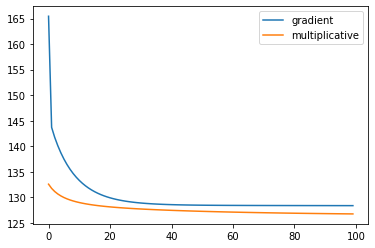

<Figure size 1440x1440 with 0 Axes>

In [216]:
plt.plot(res_1, label='gradient')
plt.plot(res_2, label='multiplicative')
plt.legend()
plt.figure(figsize=(20, 20))
plt.show()